In [185]:
from os import listdir as ld
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [139]:
ld('../input')

['sample_submission.csv', 'test.csv', 'train.csv']

In [140]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

### data shape

**Train datasets** have 42000 records, in which each record has 28\*28=784 pixels and 1 label.

In [141]:
print (train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Test datasets** have 28000 records and each record consists of 784 pixels.

In [142]:
print (test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
type(test)

pandas.core.frame.DataFrame

In [144]:
test['pixel0'].head()

0    0
1    0
2    0
3    0
4    0
Name: pixel0, dtype: int64

using iloc to get values of pandas.core.frame.DataFrame object by index

In [145]:
test.iloc[0,]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

## Visualization using plt.imshow

In [146]:
x=test.values.astype('float32')[0]
test.values.astype('float32')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

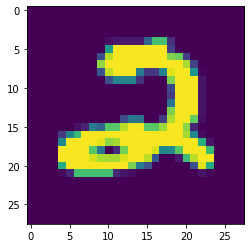

In [147]:
plt.imshow(x.reshape(28,28,1))
plt.imshow((test.iloc[0,].values).reshape(28,28,1))

Benchmarking plan: 1. KNN 2. logistic regression 3. SVM 4. Nural network

# 1. KNN 

In [148]:
split_ratio=0.9
train_size = int(train.shape[0]*split_ratio)
train_data_x = (train.iloc[:train_size,1:]).values.astype('float32')
train_data_y = (train.iloc[:train_size,0]).values.astype('int32')
test_data_x = (train.iloc[train_size:,1:]).values.astype('float32')
test_data_y = (train.iloc[train_size:,0]).values.astype('int32')
final_test_data = test.values.astype('float32')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
neigh = KNeighborsClassifier(n_neighbors=1000)
neigh.fit(train_data_x, train_data_y)

KNeighborsClassifier(n_neighbors=1000)

In [ ]:
test_data_y_pred = neigh.predict(test_data_x)

In [ ]:
print(test_data_y[:10])

In [153]:
print(test_data_y_pred[:10])

[0 0 3 5 7 9 2 8 9 9]


In [154]:
from sklearn.metrics import classification_report

In [155]:
print (classification_report(test_data_y,test_data_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       455
           1       0.61      1.00      0.76       458
           2       0.99      0.68      0.80       392
           3       0.88      0.85      0.87       448
           4       0.96      0.79      0.86       438
           5       0.93      0.71      0.81       354
           6       0.88      0.94      0.91       413
           7       0.90      0.90      0.90       421
           8       0.92      0.70      0.79       397
           9       0.77      0.87      0.81       424

    accuracy                           0.84      4200
   macro avg       0.88      0.84      0.85      4200
weighted avg       0.87      0.84      0.85      4200



## 2. logistic regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
clf = LogisticRegression(random_state=0).fit(train_data_x, train_data_y)

/home/yunwanx/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [158]:
test_data_y_pred_logistic = clf.predict(test_data_x)

In [159]:
print (classification_report(test_data_y,test_data_y_pred_logistic))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       455
           1       0.95      0.97      0.96       458
           2       0.90      0.88      0.89       392
           3       0.92      0.91      0.92       448
           4       0.93      0.92      0.93       438
           5       0.91      0.84      0.87       354
           6       0.94      0.98      0.96       413
           7       0.93      0.95      0.94       421
           8       0.84      0.87      0.86       397
           9       0.92      0.87      0.89       424

    accuracy                           0.92      4200
   macro avg       0.92      0.92      0.92      4200
weighted avg       0.92      0.92      0.92      4200



## 3. SVM

In [160]:
from sklearn import svm

In [161]:
svm_model = svm.SVC()

In [162]:
svm_model.fit(train_data_x,train_data_y)

KeyboardInterrupt: 

In [ ]:
test_data_y_pred_svm  = svm_model.predict(test_data_x)

In [ ]:
print(classification_report(test_data_y,test_data_y_pred_svm))

## 4. ANN

In [164]:
from keras.utils.np_utils import to_categorical

In [165]:
train_data_y_onehot = to_categorical(train_data_y)
test_data_y_onehot = to_categorical(test_data_y)

In [166]:
from keras.models import Sequential
from keras.layers import Dense

In [168]:
print(Dense.__doc__)

Just your regular densely-connected NN layer.

  `Dense` implements the operation:
  `output = activation(dot(input, kernel) + bias)`
  where `activation` is the element-wise activation function
  passed as the `activation` argument, `kernel` is a weights matrix
  created by the layer, and `bias` is a bias vector created by the layer
  (only applicable if `use_bias` is `True`).

  Note: If the input to the layer has a rank greater than 2, then `Dense`
  computes the dot product between the `inputs` and the `kernel` along the
  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
  For example, if input has dimensions `(batch_size, d0, d1)`,
  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
  (there are `batch_size * d0` such sub-tensors).
  The output in this case will have shape `(batch_size, d0, units)`.

  Besides, layer attributes cannot be modified after t

In [177]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])
model.fit(train_data_x,train_data_y_onehot,validation_split=0.2, epochs=3)
model.evaluate(test_data_x,test_data_y_onehot)

Epoch 1/3
945/945 [==============================] - 3s 3ms/step - loss: 1.8418 - accuracy: 0.4484 - val_loss: 1.4725 - val_accuracy: 0.5060
Epoch 2/3
945/945 [==============================] - 2s 2ms/step - loss: 1.3018 - accuracy: 0.6110 - val_loss: 1.1670 - val_accuracy: 0.6787
Epoch 3/3
132/132 [==============================] - 0s 1ms/step - loss: 0.9488 - accuracy: 0.7462


[0.9487940669059753, 0.7461904883384705]

In [176]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])
model.fit(train_data_x,train_data_y_onehot,validation_split=0.2, epochs=5)
model.evaluate(test_data_x,test_data_y_onehot)

Epoch 1/5
945/945 [==============================] - 2s 2ms/step - loss: 1.9050 - accuracy: 0.4646 - val_loss: 1.5144 - val_accuracy: 0.6217
Epoch 2/5
945/945 [==============================] - 2s 2ms/step - loss: 1.2545 - accuracy: 0.6698 - val_loss: 1.0860 - val_accuracy: 0.7007
Epoch 3/5
945/945 [==============================] - 2s 2ms/step - loss: 0.9788 - accuracy: 0.7046 - val_loss: 0.8836 - val_accuracy: 0.7266
Epoch 4/5
945/945 [==============================] - 2s 2ms/step - loss: 0.8496 - accuracy: 0.7390 - val_loss: 0.8214 - val_accuracy: 0.7422
Epoch 5/5
132/132 [==============================] - 0s 1ms/step - loss: 0.7580 - accuracy: 0.7755


[0.7579656839370728, 0.7754762172698975]

## ANN relu

In [178]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(784,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])
model.fit(train_data_x,train_data_y_onehot,validation_split=0.2, epochs=3)
model.evaluate(test_data_x,test_data_y_onehot)

Epoch 1/3
945/945 [==============================] - 2s 3ms/step - loss: 2.2987 - accuracy: 0.2300 - val_loss: 1.9153 - val_accuracy: 0.2810
Epoch 2/3
945/945 [==============================] - 2s 2ms/step - loss: 1.8034 - accuracy: 0.3115 - val_loss: 1.6658 - val_accuracy: 0.3519
Epoch 3/3
132/132 [==============================] - 0s 1ms/step - loss: 1.4930 - accuracy: 0.3714


[1.4930205345153809, 0.37142857909202576]

## ANN + normalization

In [197]:
train_data_x_norm = train_data_x-train_data_x.mean()/train_data_x.std()
test_data_x_norm = test_data_x-test_data_x.mean()/test_data_x.std()
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])
model.fit(train_data_x_norm,train_data_y_onehot,validation_split=0.2, epochs=3)
model.evaluate(test_data_x_norm,test_data_y_onehot)

Epoch 1/3
945/945 [==============================] - 2s 2ms/step - loss: 1.8787 - accuracy: 0.4569 - val_loss: 1.4940 - val_accuracy: 0.5593
Epoch 2/3
945/945 [==============================] - 2s 2ms/step - loss: 1.2565 - accuracy: 0.6724 - val_loss: 1.0988 - val_accuracy: 0.7187
Epoch 3/3
132/132 [==============================] - 0s 1ms/step - loss: 0.8681 - accuracy: 0.7764


[0.8681401610374451, 0.7764285802841187]

## CNN 

In [237]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [238]:
model=Sequential()
#model.add(Dense(10,input_shape=(28,28,1)))
model.add(Conv2D(10,kernel_size=3,activation='sigmoid',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data_x_norm.reshape(train_data_x_norm.shape[0],28,28,1),train_data_y_onehot,validation_split=0.2,epochs=3,batch_size=100)
model.evaluate(test_data_x_norm.reshape(test_data_x_norm.shape[0],28,28,1),test_data_y_onehot)

Epoch 1/3
303/303 [==============================] - 5s 15ms/step - loss: 0.6700 - accuracy: 0.8228 - val_loss: 0.3215 - val_accuracy: 0.9189
Epoch 2/3
303/303 [==============================] - 4s 13ms/step - loss: 0.2811 - accuracy: 0.9214 - val_loss: 0.2618 - val_accuracy: 0.9222
Epoch 3/3
132/132 [==============================] - 1s 4ms/step - loss: 0.1910 - accuracy: 0.9445


[0.19100730121135712, 0.944523811340332]

## CNN 2

In [261]:
model=Sequential()
#model.add(Dense(10,input_shape=(28,28,1)))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
#model.add(Conv2D(100,kernel_size=(4,4),activation='sigmoid',input_shape=(28,28,1)))
#model.add(MaxPooling2D())
model.add(Flatten())
#model.add(Dense(100,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data_x_norm.reshape(train_data_x_norm.shape[0],28,28,1),train_data_y_onehot,validation_split=0.2,epochs=20,batch_size=100)
model.evaluate(test_data_x_norm.reshape(test_data_x_norm.shape[0],28,28,1),test_data_y_onehot,batch_size=100)

Epoch 1/20
303/303 [==============================] - 47s 156ms/step - loss: 1.2831 - accuracy: 0.8854 - val_loss: 0.1338 - val_accuracy: 0.9595
Epoch 2/20
303/303 [==============================] - 48s 158ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.0901 - val_accuracy: 0.9733
Epoch 3/20
303/303 [==============================] - 46s 151ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.0896 - val_accuracy: 0.9749
Epoch 4/20
303/303 [==============================] - 44s 146ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0678 - val_accuracy: 0.9790
Epoch 5/20
303/303 [==============================] - 47s 154ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0791 - val_accuracy: 0.9780
Epoch 6/20
303/303 [==============================] - 43s 141ms/step - loss: 0.0350 - accuracy: 0.9890 - val_loss: 0.0808 - val_accuracy: 0.9788
Epoch 7/20
303/303 [==============================] - 43s 142ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0655 - val_ac

[0.08524676412343979, 0.9819047451019287]

In [255]:
predictions = model.predict_classes(test.values.astype('float32').reshape(test.shape[0],28,28,1))

In [258]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)